# Image processing

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls 'gdrive/MyDrive/Career/Konofagou/Imaging/data_for_ml'

'3 Marble phantom'  'box phantom 1'  'Clear phantom'   Ecoflex






## Read data and check sum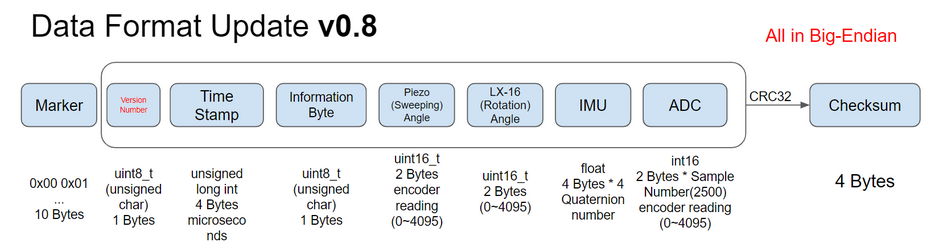

###Load data by byte



In [ ]:
fname='gdrive/MyDrive/Career/Konofagou/Imaging/data/RedPitaya_WhiteFin_V3.7.1_V0.8_BoxPhantom_New30mmLens+Glycerin+2D+20slices200res_2.dat'
byte_list = []
with open(fname, "rb") as f:
    while True:
        byte = f.read(1)
        if not byte:
            break
        byte_list.append(byte)


In [ ]:
# total number of bytes in dataset
len(byte_list)

20160000

In [ ]:
temp=byte_list[0:11080]
import struct

def load_data(byte_line): #byte line has length of 5040
  # load marker
  marker=[]
  for i in range(10):
    val = struct.unpack('B', byte_line[i])[0]
    marker.append(val)

  # load version number
  version = struct.unpack('B', byte_line[10])[0]
  # load time stamp
  time = struct.unpack('I', b''.join(byte_line[11:15]))
  # load info
  info = struct.unpack('B', byte_line[15])
  # load piezo angle
  angle = struct.unpack('H', b''.join(byte_line[16:18]))
  # load LX-16 angle
  lx16 = struct.unpack('H', b''.join(byte_line[18:20]))
  # load IMU
  IMU = struct.unpack('f'*4, b''.join(byte_line[20:36]))
  # load ADC
  ADC = struct.unpack('h'*2500, b''.join(byte_line[36:5036]))
  # load checksum
  checksum = struct.unpack('I', b''.join(byte_line[5036:5040]))

  return marker, version, time, info, angle, lx16, IMU, ADC, checksum


In [ ]:
dline_bytes=5040 #number of bytes per dataline
markers=[]
versions=[]
times=[]
infos=[]
angles=[]
lx16s=[]
IMUs=[]
ADCs=[]
checksums=[]

for i in range(int(len(byte_list)/dline_bytes)):
  temp=byte_list[i*dline_bytes:(i+1)*dline_bytes]
  marker, version, time, info, angle, lx16, IMU, ADC, checksum = load_data(temp)
  markers.append(marker)
  versions.append(version)
  times.append(time)
  infos.append(info)
  angles.append(angle)
  lx16s.append(lx16)
  IMUs.append(IMU)
  ADCs.append(ADC)
  checksums.append(checksum)


In [ ]:
# randomly check markers to ensure correct loading
markers[200:210]

[[0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]]

Alternative method of loading data 

In [ ]:
import numpy as np
#define datatype
dtype=[]
for i in range(10): 
  dtype.append(('marker'+str(i), np.uint8)) #append marker dtype
dtype.extend([('version', np.uint8), ('time',np.uint), ('info', np.uint8), ('angle', np.uint16), ('lx16', np.uint16), ('IMU1', np.float32), ('IMU2', np.float32), ('IMU3', np.float32), ('IMU4', np.float32)])
for i in range(2500):
  dtype.extend([('ADC'+str(i), np.uint16)])
#dtype.extend([('checksum', np.uint8)])

#load data by line, separated by marker
fname='gdrive/MyDrive/Career/Konofagou/Imaging/data/RedPitaya_WhiteFin_V3.7.1_V0.8_BoxPhantom_New30mmLens+Glycerin+2D+20slices200res_2.dat'
marker=np.array([0,1,0,1,0,1,0,1,0,1], dtype=np.uint8)
data = np.fromfile(fname, dtype=dtype) #specify that the data type is big endian 

In [ ]:
# randomly check data line
data[50]

(0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 8, 534803423325654528, 199, 0, 0, 0., 0., 0., 6.1263865e-30, 47351, 7947, 61955, 10739, 48128, 19979, 15099, 32502, 32520, 61190, 36852, 15099, 24587, 51198, 26358, 64000, 11275, 19193, 23548, 39691, 26370, 15858, 62721, 64775, 63988, 24570, 56840, 26881, 36602, 3846, 37119, 52732, 15106, 47614, 18949, 15624, 24826, 34547, 18173, 52996, 23807, 43520, 24330, 61956, 57082, 30718, 55037, 40699, 34042, 39938, 50175, 24312, 62716, 28930, 39428, 54020, 38917, 35588, 53762, 2049, 17915, 37370, 8701, 5371, 13309, 6914, 20741, 34569, 60415, 29685, 47102, 22539, 42493, 7156, 16129, 44299, 53498, 45302, 54787, 23307, 63478, 15098, 22281, 46087, 13045, 20474, 55050, 45570, 21491, 46334, 37898, 22523, 64247, 56579, 64265, 47867, 8699, 13575, 55812, 22008, 61179, 64517, 38913, 46328, 24063, 51718, 65023, 13818, 58113, 44548, 61180, 2300, 8707, 53249, 28667, 29438, 57603, 8705, 27390, 6658, 44548, 6656, 28670, 44801, 33792, 24828, 26877, 55551, 25855, 42750, 19456, 5555

In [ ]:
len(data[10])

2519

### Plot image from ADC, piezo angle, LX16 angle

135 degrees (every 256)

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def square2fan(fn_squ, fn_fan, angle=135, k=1):
    """ Convert a rectangular image into a sector
    
         fn_squ-input file name
         fn_fan-output file name
         angle-the angle of the sector clip
         k-sector factor, k is greater than 1 output ring
    """
    
    im = Image.open(fn_squ) # Open the input image as a PIL object
    mode = im.mode # Input image mode
    w, h = im.size # Input image resolution
    rows, cols = int(np.ceil(h*k)), int(np.ceil(2*h*k*np.sin(np.radians(angle)))) # Output image height and width
    cols += cols%2 # If the width is singular, add 1
    
    im_squ = np.array(im) # Convert input image to numpy array
    im_fan = np.zeros((rows, cols, im_squ.shape[2]), dtype=np.uint8) # Generate numpy array of output image (full transparency)
    
    alpha = np.radians(np.linspace(-angle, angle, w)) # Generate a fan-shaped angle sequence, the length is consistent with the width of the input image
    for i in range(w): # Traverse each column of the input image
        # The row number of each pixel in the current column on the output image
        d = np.cos(alpha[i])*rows
        lats = np.int_(np.linspace(d*(k-1)/k, d, h)).astype(np.int)
        
        # The column number of each pixel in the current column on the output image
        d = np.sin(alpha[i])*rows
        lons = np.int_(np.linspace(cols/2+d*(k-1)/k, cols/2+d, h)).astype(np.int)
        
        # Replace the corresponding point on the output image with the point of the input image
        im_fan[(lats, lons)] = im_squ[:,i]
    
    # Interpolation between adjacent points in blank area
    for row in range(int(rows*(k-1)/k)+1, rows):
        ps, pe = 0, 0
        for col in range(cols):
            if im_fan[row, col, 3] > 0:
                if ps == 0:
                    ps, pe = col, col
                else:
                    pe = col
        for col in range(ps-1 ,pe):
            if im_fan[row, col, 3] == 0:
                im_fan[row, col] = im_fan[row, col-1]
    
    # Drawing
    plt.figure('B Ultra Fan Scan', facecolor='#f4f4f4', figsize=(15, 7))
    plt.subplot(121)
    plt.imshow(im_squ)
    plt.subplot(122)
    plt.imshow(im_fan)
    plt.savefig('out_plt.png')
    plt.show()
    
    # Save as file
    im = Image.fromarray(im_fan, mode=im.mode)
    im.save(fn_fan)
    

In [ ]:
import math

# reposition data lines according to angles
angles=np.array(angles)
ADCs=np.array(ADCs)
max_angle=np.amax(angles)
min_angle=np.amin(angles)
degree=135*math.pi/180

angle_ind=np.argsort(angles)
sorted_angles=angles[angle_ind[::]]
sorted_ADC=ADCs[angle_ind[::]]

ADC_length=2500
num_lines=len(markers)


In [ ]:
# image_array=np.empty([num_lines, ADC_length])
# for i in range(num_lines):
#   for j in range(ADC_length):
#     image_array[i][j]=ADCs[i][j]

In [ ]:
#adjust range of data for plotting
max_data=np.amax(ADCs)
min_data=np.amin(ADCs)

image_array=ADCs-min_data
new_max=np.amax(image_array)
temp_image=image_array/new_max
temp_image=temp_image*255
np.amax(temp_image)

255.0

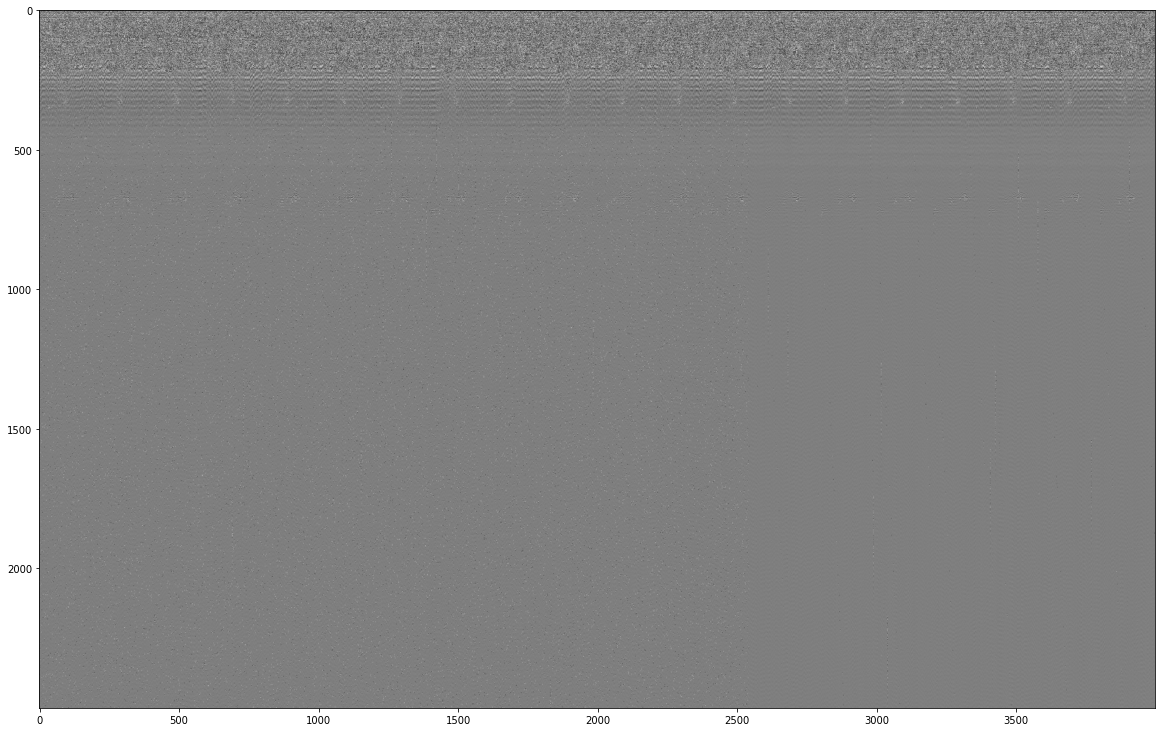

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
image=np.transpose(temp_image)
plt.rcParams["figure.figsize"] = (20,15)
fig=plt.imshow(image,cmap='gray', vmin=0, vmax=255)
fig_path=fname.replace('.dat', '.png')
plt.savefig(fig_path)

In [ ]:
# visualize plot in fan shape
fan_path = fig_path.replace('.png', '_fan.png')
square2fan(fig_path, fan_path)

IndexError: ignored

In [ ]:
import numpy as np
a=np.array([1,5,2,7,4,5,8,3])
b=a
inds=a.argsort()
b[inds[::]]

array([1, 2, 3, 4, 5, 5, 7, 8])

In [ ]:
fig_path

'gdrive/MyDrive/Career/Konofagou/Imaging/data/RedPitaya_WhiteFin_V3.7.1_V0.8_BoxPhantom_New30mmLens+Glycerin+2D+20slices200res_2.png'